In [2]:
# Imports libraries

# For accessing the crypto API

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

# For saving the dataframe as a file 

import os
import time

# Importing data analysis libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# This allows you to see all the columns and rows

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# Function: Uses the crypto API to get recent crypto data

def cryptoAPI_run():
    # Set up for the API with the key
    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'GBP'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '9fdfd4f2-091c-438b-b757-50426a8ead3c',
    }

    session = Session()
    session.headers.update(headers)


    # Getting the data
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    

    # Storing the data as a dataframe with an added 'timestamp' column

    df = pd.json_normalize(data['data'])
    df = df.drop(columns=df.columns[3:17])
    df = df.drop(columns=df.columns[-10:])
    df['timestamp'] = pd.to_datetime('now')


    # Saves the data as a csv file

    if not os.path.isfile('cryptoScraping.csv'):
        df.to_csv(
           'cryptoScraping.csv', 
           header='column_names', 
           index=False
           )
    else:
        df.to_csv('cryptoScraping.csv', 
                  mode='a', 
                  header=False, 
                  index=False
                  )
    #print(df)

In [5]:
# Running the above function

cryptoAPI_run()

In [6]:
# Function: Plots the price of cryptocurrency based on data saved
# Input: coin, the desired coins (can be multiple coins)

def cryptoPricePlot(coin=''):
    # Reads the saved csv file of data

    cryptoData = pd.read_csv('cryptoScraping.csv')
    try:
        # Extracts the data from the dataframe corresponding to the input

        df = cryptoData[cryptoData['name'].str.contains(coin, case=False)]

        # Determines if the dataframe is empty

        if df.empty:
            print('No coins with that name!')
        else: 
            # If not empty, plots the graph

            df = df.pivot(
            index='timestamp', 
            columns='name', 
            values='quote.GBP.price'
            )

            fig = df.plot(
                title='Crypto Prices',
                xlabel='Time',
                ylabel='Price(£)',
                figsize=(20, 8)
            )
            fig.legend(title='Cryptocurrencies')
    except:
        print('Error!')

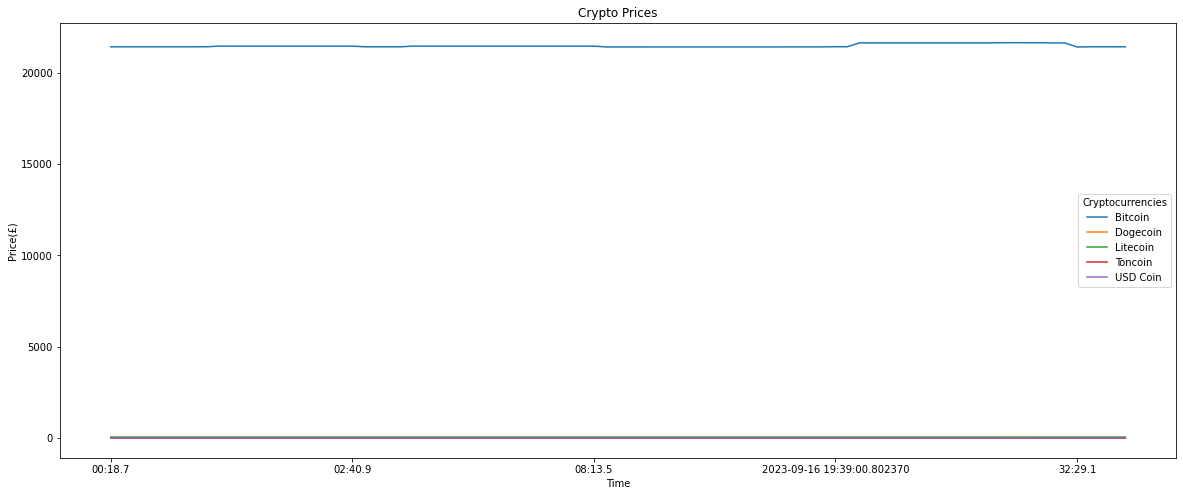

In [7]:
# Running the above function

# cryptoPricePlot(coin='dogecoin')
cryptoPricePlot(coin='coin')

In [8]:
# Function: Plots the percentage change of price over timeframe of cryptocurrency based on data saved
# Input: coin, the desired coins (can be multiple coins)

def cryptoPercentageChange(coin=''):
    # Extracts the data from the dataframe corresponding to the input
    
    cryptoData = pd.read_csv('cryptoScraping.csv')


    # Groups the data by name and gets only the required columns
    # Renames columns to easier to read names

    df = cryptoData.groupby('name', sort=False)[cryptoData.columns[6:12][::-1]].mean()
    df = df.stack()
    df = df.to_frame(name='values')
    df = df.reset_index()
    df = df.rename(columns={'level_1': 'percent_change'})
    df['percent_change'] = df['percent_change'].replace(cryptoData.columns[6:12],['1h','24h','7d','30d','60d','90d'])


    # Plots the graph of coins matching the input

    try:
        df = df[df['name'].str.contains(coin, case=False)]
        if df.empty:
            print('No coins with that name!')
        else: 
            sns.catplot(x='percent_change', y='values', hue='name', data=df, kind='point')
            plt.show()
    except:
        print('Error!')

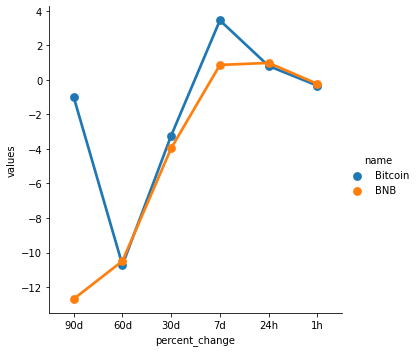

In [9]:
# Running the above function

cryptoPercentageChange(coin='b')

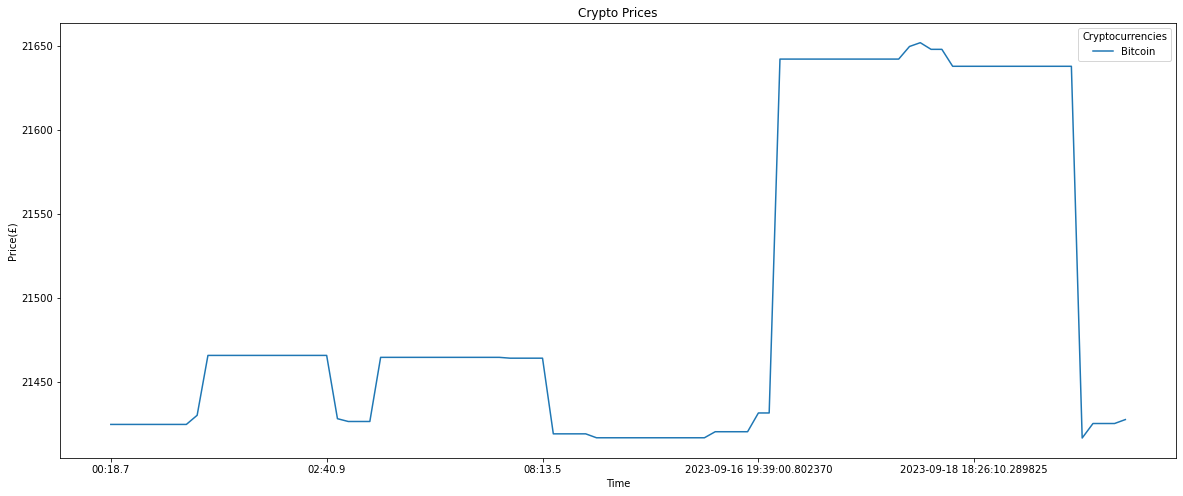

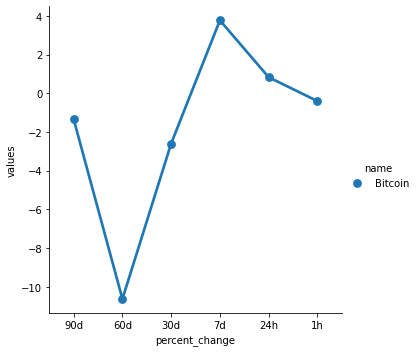

In [10]:
# Grabs data from the API 10 times with a second interval

for i in range(10):
    cryptoAPI_run()
    time.sleep(1)


# Calls the previous functions for Bitcoin

cryptoPricePlot(coin='Bitcoin')
cryptoPercentageChange(coin='Bitcoin')

In [11]:
# Grabs data from the API with a second interval whilst running

while True:
    cryptoAPI_run()
    time.sleep(1)

KeyboardInterrupt: 